In [3]:
# You can follow the same procedure with different complex datasets

# Step 1: Import necessary libraries
# Step 2: Explore dataset: example
#                   •	What are the feature names and the target names (species)?
#                   •	Display the first few rows and check the data types of each feature
#                   •	Provide summary statistics for each feature

# Step 3: Preprocess the dataset: example..
#                                Check for missing values, if found, For simplicity, let's fill missing values with the median of each column.
#                                Scaling Numerical Features

# Step 4: Split the Dataset into Training and Testing set
# Step 5: Train Models, e.g., Linear Regression Model or Decision Tree Classifier
# Step 6: Model Evaluation

In [1]:
# Step 1: Import important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the California Housing Dataset

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [22]:
# Step 3:  Now Starts Data Visualization in different forms:
# Here first you can make dataframe using pd.DataFrame() function or use data.frame
print(data.frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [29]:
# The describe() method shows a summary of the numerical attributes or statistics
data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
# One can print statistics of desired attributes, Example: lets take AveRooms, AveBedrms, AveOccup, and Population

features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [32]:
 # AveRooms is an attribute: One can take any numerical attribute from the dataset and can find its min, max, average etc values
data.frame["AveRooms"].value_counts()
data.frame["AveRooms"].max()
data.frame['AveRooms'].min()

0.8461538461538461

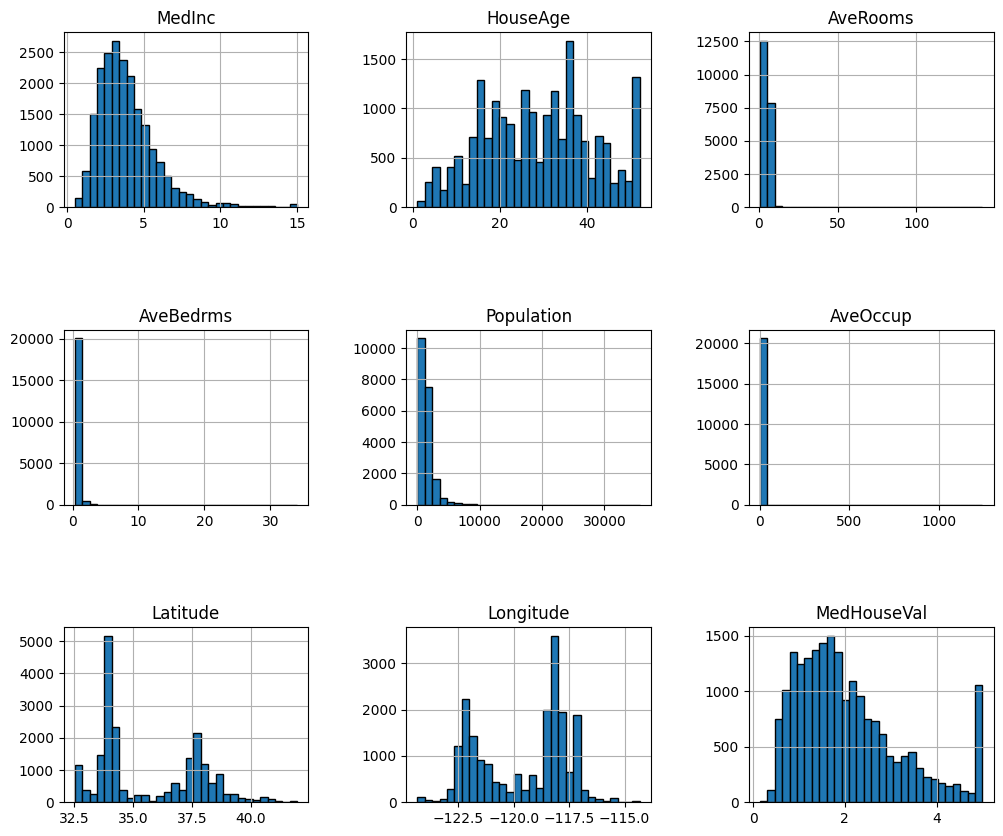

In [33]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

import matplotlib.pyplot as plt

data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

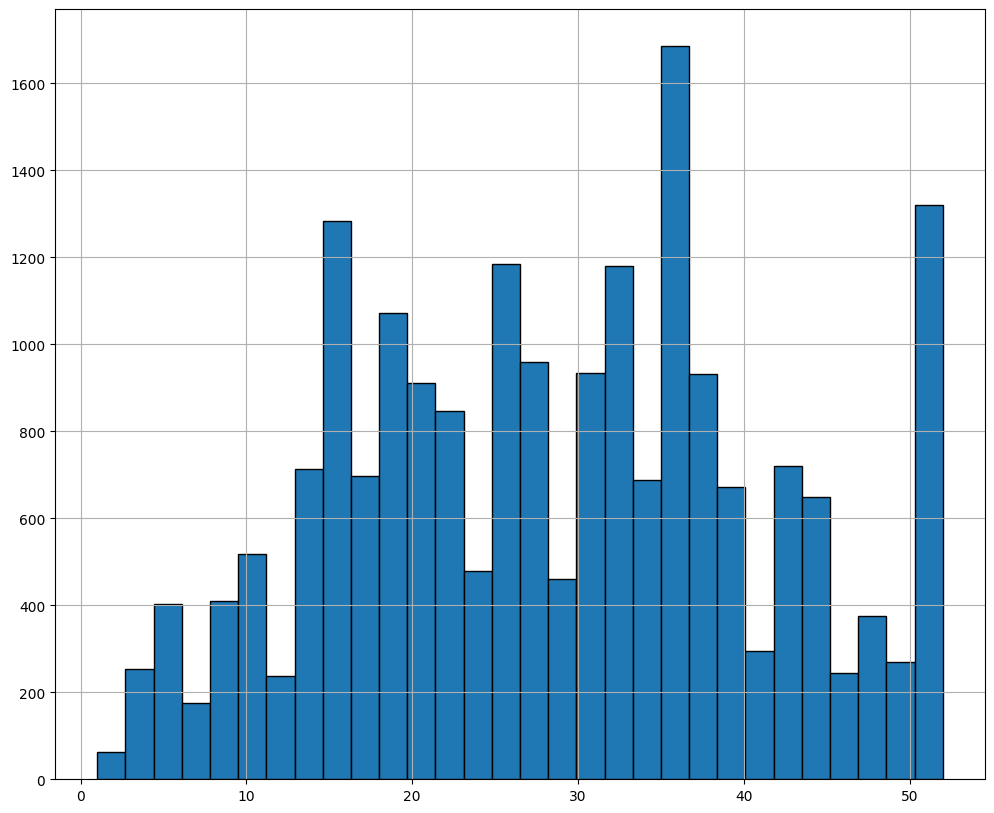

In [16]:
# plot histogram for selected numerical attributes
data.frame['HouseAge'].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [6]:
# Step 4: Preprocess the dataset:
# Step 1: Check for missing values, if found, For simplicity, let's fill missing values with the median of each column.

missing_values = data.frame.isna().sum()
data.frame.fillna(data.frame.median(), inplace=True)


# Step 2: Scaling Numerical Features
# We need to scale numerical features to make them comparable. We'll use StandardScaler for this, which scales the data to have zero mean and unit variance.

from sklearn.preprocessing import StandardScaler

# Create X = Input Features and Y = Target Variable
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target, name='target')  # Target variable

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Now Use the Preprocessed X and y to split the dataset

In [7]:
# Step 5: Split the Dataset into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train the Linear Regression Model

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Step 6: Model Evaluation
# Once the model is trained, let's evaluate its performance using the test data. We'll calculate the Mean Squared Error (MSE) and R-squared (R²) score,
# which indicates how well the model fits the data.


# Predict on the test data
y_pred = lr_model.predict(X_test)


# Calculate Mean Squared Error, root mean squared error, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.555891598695244
Root Mean Squared Error: 0.7455813830127761
R-squared: 0.5757877060324511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


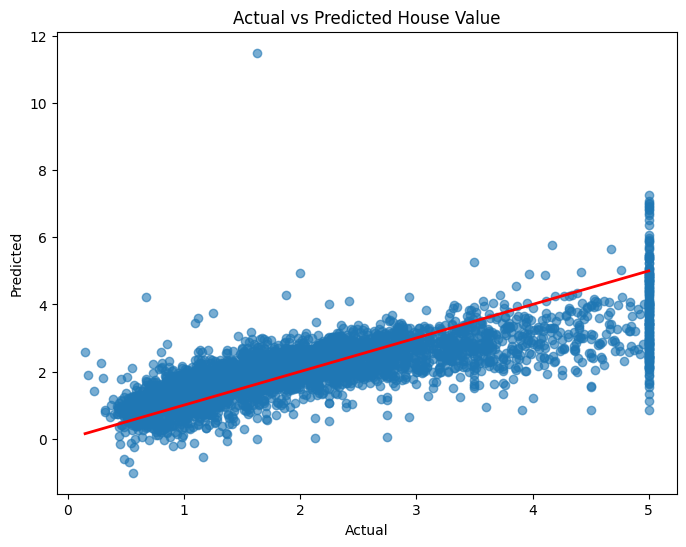

In [11]:
# Step 7: Visualize the Predictions

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Value')
plt.show()